# Urban Traffic Volume Prediction 

**Author:** Mahdi Farhani  
**Email:** mm.farhani@gmail.com  

This notebook explores the [Metro Interstate Traffic Volume](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) dataset. The aim is to perform exploratory data analysis (EDA) and establish a baseline regression model to predict the hourly traffic volume on Interstate 94, Minneapolis, using weather, holiday, and temporal features.

---

## Learning Objectives

- Understand the structure and features of the traffic dataset.
- Perform exploratory data analysis and visualize key trends.
- Engineer relevant features for modeling.
- Build and evaluate a simple baseline regression model.

## 📊 Dataset Introduction

The **Metro Interstate Traffic Volume** dataset provides hourly measurements of traffic volume along Interstate 94 in Minneapolis, Minnesota, USA, from 2012 to 2018. The data was collected by a traffic sensor located near a major interstate exit, and is closely linked to time, weather conditions, and public holidays.

This dataset is widely used for urban mobility research, traffic forecasting, and exploring the relationship between **weather phenomena** and **traffic patterns**. By analyzing the data, we can build predictive models to estimate road congestion, investigate trends over time (seasonal variations, rush hours, workdays vs holidays), and measure the impact of weather and calendar events on urban transportation.

- **Instances (Rows):** 48,204  
- **Period:** 2012-2018 (hourly intervals)  
- **Source:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

**Goal:**  
Our goal is to predict the **traffic volume** (number of vehicles) passing an interstate segment per hour, using available features (weather, time, holiday status, etc.).

---

## 📋 Column Descriptions

| Column                | Type        | Description                                                         |
|-----------------------|------------|----------------------------------------------------------------------|
| `holiday`             | Category   | Name of the holiday, or "None" if not a public holiday               |
| `temp`                | Float      | Hourly average temperature (Kelvin)                                  |
| `rain_1h`             | Float      | Amount of rain in the preceding 1 hour (mm)                          |
| `snow_1h`             | Float      | Amount of snow in the preceding 1 hour (mm)                          |
| `clouds_all`          | Integer    | Percentage of sky covered by clouds                                  |
| `weather_main`        | Category   | Main weather condition (e.g., Clear, Clouds, Rain, Snow, Mist)       |
| `weather_description` | Category   | More detailed weather condition (e.g., scattered clouds, light rain) |
| `date_time`           | DateTime   | Date and hour of the observation (local time)                        |
| `traffic_volume`      | Integer    | **Target Variable:** Number of vehicles (per hour)                   |

---


## 1. Dataset Loading and Preview

Let's load the Metro Interstate Traffic Volume dataset, specify column names, and display the first few rows to verify the data was imported correctly.

In [769]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#plt setting
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7, 4)

# Load the dataset
filename = '../data/Metro_Interstate_Traffic_Volume.csv'
dataframe= pd.read_csv(filename)
print (f"Dataset loaded successfully. {dataframe.shape[0]} rows and {dataframe.shape[1]} columns.")
dataframe.head()

Dataset loaded successfully. 48204 rows and 9 columns.


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


### Initial Data Exploration

In this section, we will:
- Check for missing values in each column
- Review the overall structure and data types
- Display basic descriptive statistics for numerical columns

In [770]:
print("Missing values per column:")
print(dataframe.isnull().sum())
print("---")

print("General DataFrame Info:")
dataframe.info()
print("---")

print("Dataset Statistical Overview:")
print(dataframe.describe())
print("---")


Missing values per column:
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64
---
General DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float

#### Feature Analysis

For each feature, we describe its type, value range, distribution, and possible impact on modeling.
Use `describe()`, `unique()`, and `value_counts()` as needed.
Pay attention to:
- Outliers or odd values
- Class imbalance for categorical features
- Missing values
- Data type conversion (integer/categorical)

In [771]:
print("Column types:\n")
print(dataframe.dtypes)
print("\nUnique columns:", dataframe.columns.tolist())


print("Numerical Features Summary:")
display(dataframe.describe().T)

categorical_cols = ['holiday', 'weather_main', 'weather_description', 'date_time']
print("Categorical Features Distinct Values:")
for col in categorical_cols:
    print(f"--- Column: {col}")
    print(dataframe[col].value_counts().head(10))
    print()



numeric_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    print(f"---\nColumn: {col}")
    print("Stats:")
    print(dataframe[col].describe())
    print("Nulls:", dataframe[col].isnull().sum())
    print("Unique values:", dataframe[col].nunique())
    print()

for col in categorical_cols:
    print(f"---\nColumn: {col}")
    print("Unique values/count:", dataframe[col].nunique())
    print("Sample values:", dataframe[col].unique()[:10])  
    print("Top 10 most common:")
    print(dataframe[col].value_counts().head(10))
    print()


Column types:

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

Unique columns: ['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description', 'date_time', 'traffic_volume']
Numerical Features Summary:


,count,mean,std,min,25%,50%,75%,max
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00


Categorical Features Distinct Values:
--- Column: holiday
holiday
Labor Day                    7
Thanksgiving Day             6
Christmas Day                6
New Years Day                6
Martin Luther King Jr Day    6
Columbus Day                 5
Veterans Day                 5
Washingtons Birthday         5
Memorial Day                 5
Independence Day             5
Name: count, dtype: int64

--- Column: weather_main
weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Name: count, dtype: int64

--- Column: weather_description
weather_description
sky is clear        11665
mist                 5950
overcast clouds      5081
broken clouds        4666
scattered clouds     3461
light rain           3372
few clouds           1956
light snow           1946
Sky is Clear         1726
moderate rain        1664


### Notes:
- All feature statistics, unique values, and data types were explored.
- Missing values—and if they exist—should be imputed or dropped before modeling.
- Extracting time-based features from `date_time` helps reveal daily/weekly patterns and will be used in feature engineering.
- Always visualize your target and key features to catch outliers and distribution properties.

Sample extracted time columns:


,date_time,hour,weekday,month,year
0,2012-10-02 09:00:00,9,1,10,2012
1,2012-10-02 10:00:00,10,1,10,2012
2,2012-10-02 11:00:00,11,1,10,2012
3,2012-10-02 12:00:00,12,1,10,2012
4,2012-10-02 13:00:00,13,1,10,2012


,temp
0,15.13
1,16.21
2,16.43
3,16.98
4,17.99


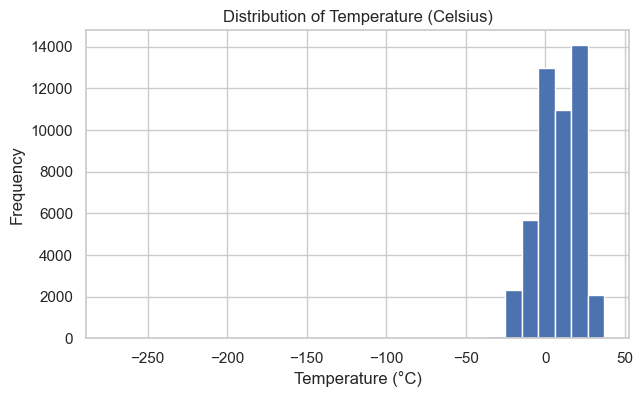

In [772]:
dataframe['date_time'] = pd.to_datetime(dataframe['date_time'])

dataframe['hour'] = dataframe['date_time'].dt.hour
dataframe['weekday'] = dataframe['date_time'].dt.weekday
dataframe['month'] = dataframe['date_time'].dt.month
dataframe['year'] = dataframe['date_time'].dt.year

print("Sample extracted time columns:")
display(dataframe[['date_time', 'hour', 'weekday', 'month', 'year']].head())

dataframe['temp'] = dataframe['temp'] - 273.15
display(dataframe[['temp']].head())

dataframe['temp'].hist(bins=30)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature (Celsius)')
plt.show()

dataframe[dataframe['temp'] < -25].shape

dataframe = dataframe[dataframe['temp'] >= -25]

#### Visualizing the Distribution of Traffic Volume

The following code creates a histogram of the target variable `traffic_volume` using Seaborn. The `bins=40` parameter ensures that the range of traffic volumes is divided into 40 intervals, and `kde=True` overlays a Kernel Density Estimate curve to show the probability distribution.

- **Purpose:**  
  To understand the range, central tendency, spread, skewness, and possible outliers in the hourly traffic counts.

- **Interpretation:**  
  If the histogram is right-skewed (a long tail on the right), it means most hours have lower to moderate traffic, but there are some hours with exceptionally high traffic.


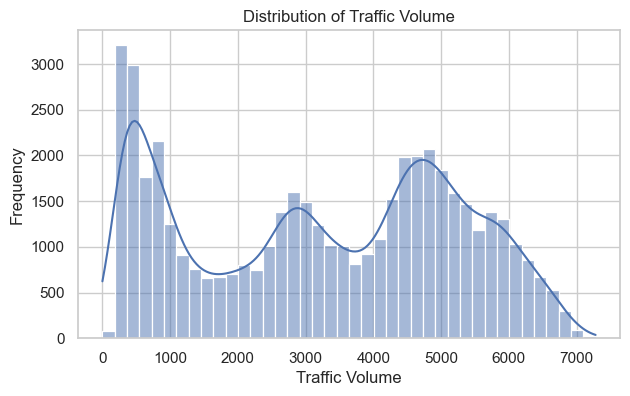

In [773]:
plt.figure()
sns.histplot(dataframe['traffic_volume'], bins=40, kde=True)
plt.title("Distribution of Traffic Volume")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.show()

### Distribution Analysis of Traffic Volume

- The histogram and KDE curve reveal a **multi-modal distribution** of hourly traffic volume.
- **Multiple peaks** suggest distinct traffic patterns corresponding to different times of the day (e.g., low traffic at night, peaks during rush hours).
- The **first mode** (0–1000) likely represents nighttime or early hours; the **second and third modes** (around 3000 and 5000) are probably linked to midday and evening peaks.
- The long right-tail and rare high values (>7000) may indicate outliers.
- **Conclusion:**  
  This distribution suggests the importance of time-based feature engineering. Further, separating analysis by hour-of-day may reveal even clearer traffic patterns.

---

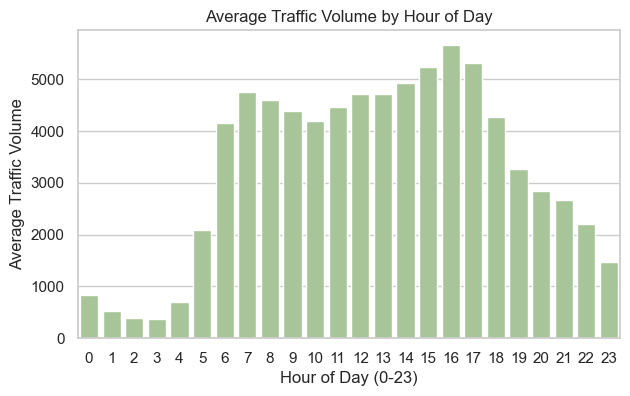

In [774]:
hourly_traffic = dataframe.groupby('hour')['traffic_volume'].mean()

plt.figure()
sns.barplot(x=hourly_traffic.index, y=hourly_traffic.values, palette="crest",legend=False,hue=0.1)
plt.title("Average Traffic Volume by Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Average Traffic Volume")
plt.show()

### ⏰ Traffic Volume Patterns: Overall vs. Hourly

The overall distribution of `traffic_volume` is multi-modal, indicating the presence of fundamentally different traffic behaviors throughout a 24-hour cycle— from quiet nighttime hours to intense rush hour peaks.

By examining the **average traffic volume for each hour**, the sources of the main peaks and valleys in the overall histogram become clear. There is a sharp increase in traffic starting around 6:00, with sustained high levels during business hours and particularly pronounced peaks in the late afternoon. The overnight hours (0–5 AM) consistently show low traffic volumes.

**Key modeling insight:**  
Rather than treating traffic volume as a single homogeneous variable, it is essential to incorporate time-based features when building predictive models. This temporal breakdown explains the multi-modal distribution and should inform future feature engineering and data preprocessing steps.


#### ⚡ Additional EDA Recommendations

- **Visualize outliers and extreme values** to prevent their undue influence on downstream modeling.
- **Investigate temporal patterns** not only by hour but also by day of week and holidays, as these may reveal further structure.
- **Carefully check for missing or anomalous data** to ensure data quality.
- **Explore relationships** between traffic volume and other explanatory features (e.g., weather, temperature) using correlation plots and visual explorations.
- **Document any data biases or coverage gaps** to contextualize your findings and model limitations.


### Outlier Detection in Traffic Volume Data

We identified outliers in the target variable `traffic_volume` using boxplots and the IQR statistical method. These extreme values can be caused by unusual events such as road closures, accidents, or data recording errors. For further modeling, we review and decide whether to exclude, cap, or keep these records based on their context and distribution.

**Key points:**
- Outliers were detected both in very low and extremely high traffic volumes.
- We also screened for impossible values (negative or zero traffic volumes).
- Visualization by hour highlighted that certain outliers happen typically during off-peak hours.


#### Boxplot Analysis of Traffic Volume

The boxplot of `traffic_volume` shows the distribution and presence of outliers in the dataset. Key observations:

- **Interquartile Range (IQR):** Most data points are centered between approximately 1,200 and 4,800 vehicles per hour (the edges of the box).
- **Median:** The median (central black line) is close to the center of the IQR, indicating a relatively symmetric core distribution for the main traffic flow.
- **Whiskers:** The whiskers extend to nearly 0 and just above 7,000. These set the boundaries for typical traffic volumes, beyond which any data point is considered an outlier by the classic boxplot definition.
- **Outliers:** Only a handful of data points are considered outliers (shown as dots beyond the whiskers). The majority of traffic_volume values are inside the normal range.
- **No significant skewness in box:** The box itself is not extremely unbalanced to either side, supporting our previous observation that the main distribution is not highly skewed but may be multi-modal due to rush hours.

*Practical note:*  
A small number of records with extremely low (close to zero) or extremely high (above 7,000) traffic volumes exist, warranting additional review for possible data quality issues or special events (e.g., maintenance, road closure).

---


#### Hourly Boxplot Analysis of Traffic Volume

The hourly boxplots of `traffic_volume` reveal critical patterns about data variability, outliers, and commuter behavior throughout the day:

- **Night Hours (0-5):**
  - Traffic volumes are low with little variation.
  - Outliers (black circles) are much more common, many of which are near zero—possibly due to near-empty roads or special conditions (road closure, sensor anomalies).
- **Morning Peak (6-9):**
  - Sharp increase in both the median and spread of traffic volumes, corresponding to the morning commute.
  - The variability within these hours is high, and a wider range of outliers can be observed.
- **Midday (10-15):**
  - Medians are lower and variability decreases compared to rush hours.
  - Still, outliers exist at both the low and high traffic ranges, reflecting variable midday traffic patterns.
- **Evening Peak (16-18):**
  - Another distinct increase in the median and spread is seen.
  - The range is broad, with significant outliers mainly on the lower side (possibly sudden drops in traffic due to incidents).
- **Late Evening (19-23):**
  - Median volumes drop and spread narrows.
  - Outliers increase again, especially at low traffic volumes.

**Observations:**
- Traffic volume outliers are not distributed equally across hours—they are much more likely at night and during less busy midday hours.
- The multi-modal, hour-dependent pattern shows why a single overall traffic_volume boxplot lacks nuance.
- Data with near-zero volumes at unusual hours may warrant closer inspection for error or special events.

*Practical tip:*  
When cleaning or modeling, consider outlier behavior on an hourly basis, not just across the full dataset. Removing outliers only globally could lead to discarding valuable nighttime or weekend observations.

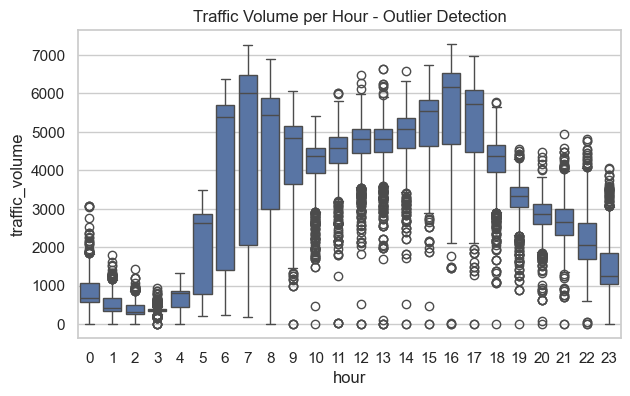

In [775]:
plt.figure(figsize=(7,4))
sns.boxplot(x=dataframe['hour'], y=dataframe['traffic_volume'])
plt.title('Traffic Volume per Hour - Outlier Detection')
plt.show()



#### Interpretation of the Hourly Traffic Volume Boxplot

This hour-by-hour boxplot offers deep insight into the temporal dynamics and variability of traffic volume:

- **1. Daily Traffic Pattern:**
  - During late night and early morning hours (0-5), traffic is consistently low, reflecting minimal nocturnal driving.
  - Starting from 6 AM, a sharp rise is observed, peaking between 7 and 9 AM, corresponding to morning rush hour.
  - After 9 AM, traffic volume decreases and remains relatively steady throughout midday.
  - A second clear peak appears around 4-6 PM (16-18), representing evening rush hour and commuters returning home.
  - After 7 PM, volumes gradually decline again towards nighttime levels.

- **2. Outlier Distribution:**
  - Outliers are heavily concentrated during nighttime and early morning hours, often at or near zero—possibly indicating empty roads, maintenance events, or sensor issues.
  - Both morning and evening peak hours show a broad interquartile range and a significant number of outliers, reflecting variable, sometimes extreme congestion or unusual traffic drops (accidents, sudden events).
  - Midday and night hours feature fewer outliers, mostly at the lower end, possibly due to sporadic dips in traffic.

- **3. Spread and Variability:**
  - The width of the box (interquartile range) is greatest during rush hours, indicating higher variability in commuter behavior.
  - In quiet nighttime hours, the box is narrow, signaling highly consistent (low) traffic volumes.

- **4. Importance of Temporal Analysis:**
  - Traffic behavior and outlier occurrence are highly time-dependent. Overall (global) analyses may miss crucial details present only at specific times.
  - Thus, data cleaning, outlier handling, or even model training should incorporate hourly segmentation to preserve important patterns and avoid loss of valuable edge-case data.

**In summary:**  
This visualization confirms that only time-aware analysis can accurately capture the real-world behavior of traffic volume. Any data-cleansing or modeling effort should respect the strong temporal regularities and outlier characteristics revealed by the hourly plots.


In addition to hourly patterns, we investigated how traffic volume varies by day of week and holidays.

- **Weekdays vs. Weekends:** 
  Average and distribution of traffic volume are distinctly different; weekends typically show lower peaks and more uniform volumes throughout the day.
- **Day of Week:** 
  Each day exhibits a unique profile, with Mondays and Fridays sometimes showing higher variability.
- **Holidays:** 
  Traffic volumes during public holidays are usually much lower (unless coinciding with special events). The distribution is noticeably distinct from regular weekdays.
- **Combined Effects:** 
  A heatmap of average traffic by hour and day of week reveals complex, structured patterns—e.g., rush hours are much less pronounced on weekends and holidays.

> **Practical insight:**  
  Time-based features, especially day-of-week and holiday flags, can substantially improve the predictive power of traffic forecasting models.


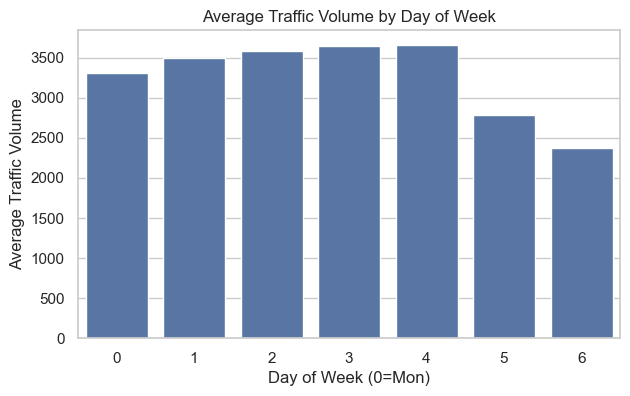

In [776]:
dataframe['is_weekend'] = dataframe['weekday'] >= 5

plt.figure(figsize=(7,4))
sns.barplot(x='weekday', y='traffic_volume', data=dataframe, errorbar=None)
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Day of Week')
plt.show()

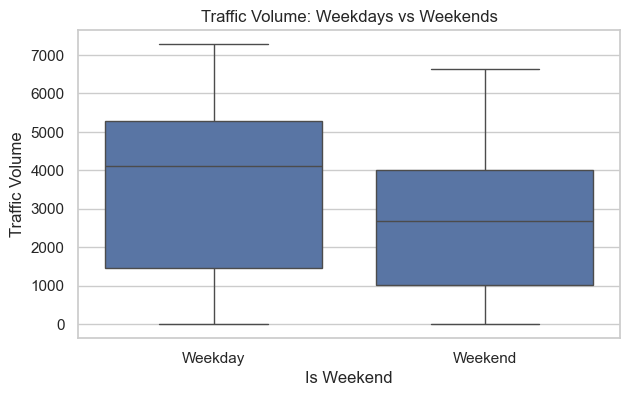

In [777]:
plt.figure(figsize=(7,4))
sns.boxplot(x='is_weekend', y='traffic_volume', data=dataframe)
plt.xlabel('Is Weekend')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume: Weekdays vs Weekends')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()


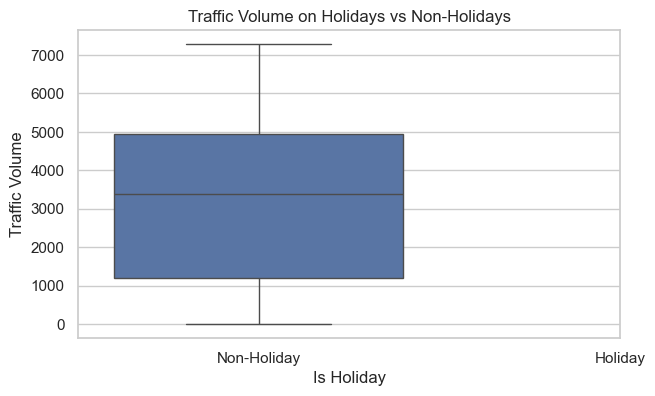

In [778]:
dataframe['is_holiday'] = dataframe['holiday'] != 'None'

plt.figure(figsize=(7,4))
sns.boxplot(x='is_holiday', y='traffic_volume', data=dataframe)
plt.xlabel('Is Holiday')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume on Holidays vs Non-Holidays')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()


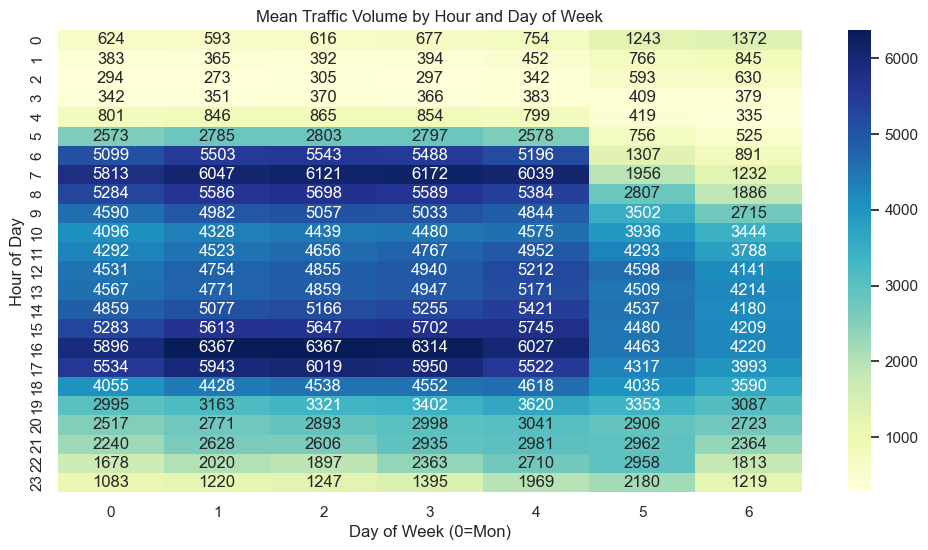

In [779]:
pivot = dataframe.pivot_table(values='traffic_volume',
                       index='hour', columns='weekday', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Hour of Day')
plt.title('Mean Traffic Volume by Hour and Day of Week')
plt.show()

## Temporal Traffic Pattern Analysis

### 1. **Average Traffic Volume by Day of Week**
- **Observation:** Traffic peaks from Monday to Friday (especially midweek), then drops sharply on weekends (Saturday and Sunday).
- **Insight:** A strong weekly pattern is evident; weekdays show higher, more sustained traffic, while weekends are noticeably lighter and smoother.

---

### 2. **Traffic Volume: Weekdays vs. Weekends**
- **Observation:** Weekdays have a higher average and wider spread of traffic volume (boxplot), indicating strong commuter influence.
- **Insight:** Weekend traffic is both lower and less variable, pointing to a fundamentally different travel behavior, likely less commuting and more recreational trips.

---

### 3. **Traffic Volume on Holidays vs. Non-Holidays**
- **Observation:** On public holidays, both average and spread of traffic decrease significantly.
- **Insight:** Holidays suppress urban traffic demand, suggesting many people avoid work and routine travel.

---

### 4. **Mean Traffic Volume by Hour and Day of Week (Heatmap)**
- **Observation:** Pronounced morning and evening rush hours on weekdays (7–9 AM, 4–6 PM) are greatest, while on weekends and holidays these peaks flatten or nearly disappear.
- **Insight:** Both the hour of day, day of week, and holiday status are crucial for modeling real-world traffic dynamics.

---

**Conclusion:**  
Traffic is not only a function of the clock, but also depends deeply on the day and holiday effects. Including these temporal features can dramatically improve the predictive performance of machine learning models.

---

## Exploring Relationships: Traffic Volume & Explanatory Features

### 1. Correlation Analysis

Use correlation coefficients to quantify the linear relationship between `traffic_volume` and numeric features (e.g., `temp`, `rain_1h`, `clouds_all`):

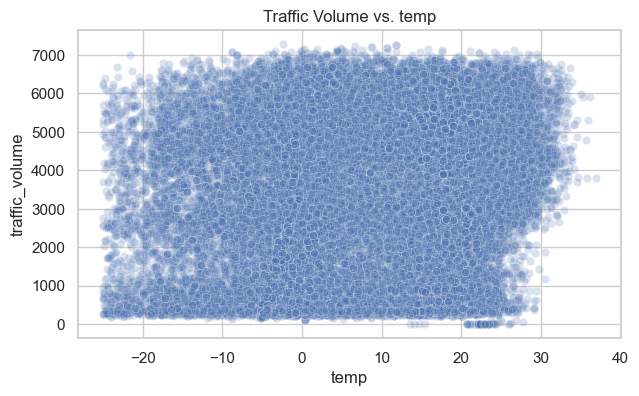

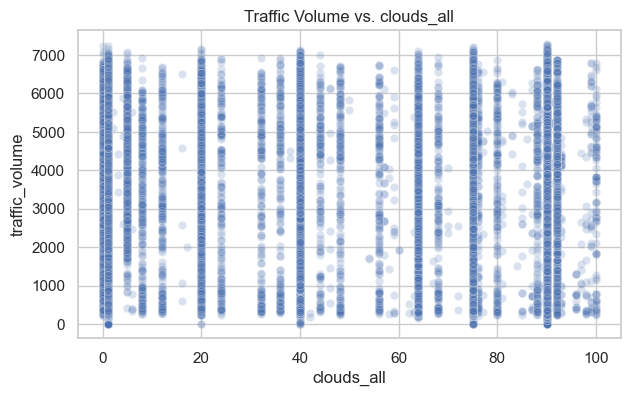

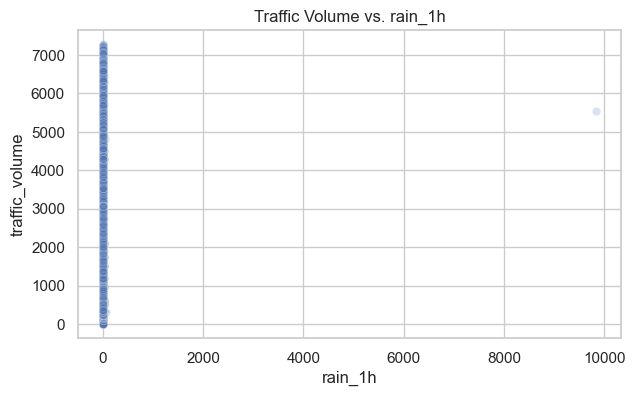

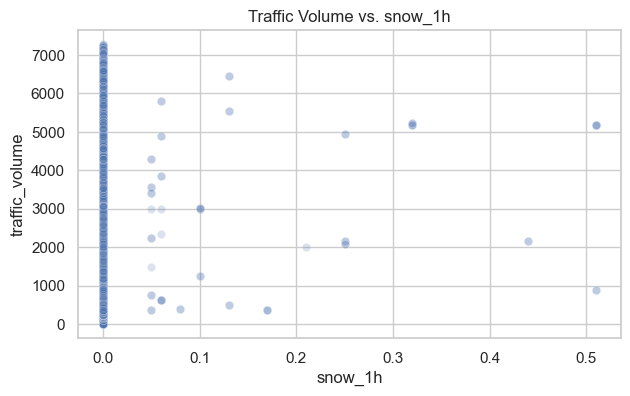

In [780]:
features = ['temp', 'clouds_all', 'rain_1h', 'snow_1h']
for col in features:
    plt.figure(figsize=(7,4))
    sns.scatterplot(x=dataframe[col], y=dataframe['traffic_volume'], alpha=0.2)
    plt.title(f'Traffic Volume vs. {col}')
    plt.show()


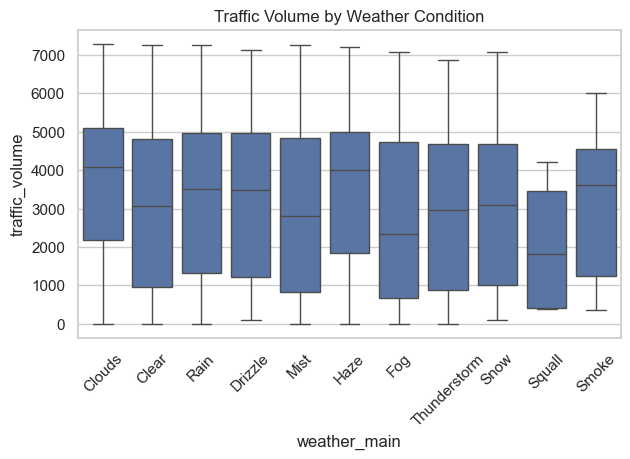

In [781]:
plt.figure(figsize=(7,4))
sns.boxplot(x='weather_main', y='traffic_volume', data=dataframe)
plt.xticks(rotation=45)
plt.title('Traffic Volume by Weather Condition')
plt.show()


### Data Cleaning and Feature Engineering
#### 1 Outlier Removal in Rain Data
To eliminate unrealistic outlier values, all records where `rain_1h` is greater than or equal to 500 (most likely data entry errors) were removed.
#### 2. Binary Features for Rain and Snow
Two new binary features were engineered to indicate the presence of rain or snow for each record.
#### 3. Weather Condition Text Standardization
String values in the weather_main column were standardized by stripping extra spaces and converting all entries to lowercase.
#### 4. Grouping Rare Weather Categories
Weather conditions that appear less than 100 times in the dataset were grouped into a single "Other" category as part of cleaning and simplifying the feature.

In [782]:
dataframe = dataframe[dataframe['rain_1h'] < 500]  

dataframe['is_rain'] = (dataframe['rain_1h'] > 0).astype(int)
dataframe['is_snow'] = (dataframe['snow_1h'] > 0).astype(int)

dataframe['weather_main'] = dataframe['weather_main'].str.strip().str.lower()
rare_weather = dataframe['weather_main'].value_counts()[dataframe['weather_main'].value_counts() < 100].index
dataframe['weather_main_cleaned'] = dataframe['weather_main'].replace(rare_weather, 'other')

### Handling Categorical Features: One-Hot Encoding for `weather_main`

To prepare the `weather_main` categorical feature for machine learning models, we applied **one-hot encoding**. This process converts each unique value in the `weather_main` column (except the first, due to `drop_first=True`) into a separate binary column, indicating the presence (`1`) or absence (`0`) of that weather type for each observation. This step is critical to ensure that machine learning algorithms properly handle categorical variables without inferring any ordinal relationship between them.

Note: After this step, the original weather_main column is replaced by several new columns (e.g., weather_main_clouds, weather_main_rain, etc.), each representing one of the weather conditions.

In [783]:
dataframe = pd.get_dummies(dataframe, columns=['weather_main_cleaned'])
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48075 entries, 0 to 48203
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   holiday                            61 non-null     object        
 1   temp                               48075 non-null  float64       
 2   rain_1h                            48075 non-null  float64       
 3   snow_1h                            48075 non-null  float64       
 4   clouds_all                         48075 non-null  int64         
 5   weather_main                       48075 non-null  object        
 6   weather_description                48075 non-null  object        
 7   date_time                          48075 non-null  datetime64[ns]
 8   traffic_volume                     48075 non-null  int64         
 9   hour                               48075 non-null  int32         
 10  weekday                            4807

### Dropping Unnecessary Columns Before Train/Test Split

To prevent information leakage and ensure that only relevant features are used for model training and evaluation, it is essential to drop unnecessary columns before splitting the data into training and test sets. These may include original categorical columns that have been replaced by one-hot encoding, columns not related to modeling (such as IDs or timestamps), or any features not intended for modeling.

For example, after one-hot encoding `weather_main`, the original column can be safely dropped (if not already by `get_dummies`), and similarly, irrelevant columns like `date_time` or identifiers can be excluded:


In [784]:
selected_columns = [ 'is_rain', 'is_snow',
                    'hour','weekday',
                    'is_weekend','is_holiday',
                    'weather_main_cleaned_other','weather_main_cleaned_clear','weather_main_cleaned_clouds',
                    'weather_main_cleaned_drizzle'  ,'weather_main_cleaned_fog','weather_main_cleaned_haze',
                    'weather_main_cleaned_mist'  ,'weather_main_cleaned_rain','weather_main_cleaned_snow',
                    'weather_main_cleaned_thunderstorm','traffic_volume']

new_dataframe=dataframe[selected_columns].copy()
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48075 entries, 0 to 48203
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   is_rain                            48075 non-null  int32
 1   is_snow                            48075 non-null  int32
 2   hour                               48075 non-null  int32
 3   weekday                            48075 non-null  int32
 4   is_weekend                         48075 non-null  bool 
 5   is_holiday                         48075 non-null  bool 
 6   weather_main_cleaned_other         48075 non-null  bool 
 7   weather_main_cleaned_clear         48075 non-null  bool 
 8   weather_main_cleaned_clouds        48075 non-null  bool 
 9   weather_main_cleaned_drizzle       48075 non-null  bool 
 10  weather_main_cleaned_fog           48075 non-null  bool 
 11  weather_main_cleaned_haze          48075 non-null  bool 
 12  weather_main_cleaned_mi

### Train/Test Split

To evaluate the generalization performance of our model, we split the dataset into training and testing sets.  
Here, 80% of the data is used for training, and 20% is held out for testing.

In [785]:
X = new_dataframe.drop('traffic_volume', axis=1) 
y = new_dataframe['traffic_volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling with StandardScaler

Many machine learning algorithms perform better when numerical features are standardized.  
Here, we use `StandardScaler` to scale the features so that each has a mean of 0 and a standard deviation of 1.

In [786]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Baseline Modeling: Linear Regression

For our initial modeling step, we use a simple **Linear Regression** as a baseline.  
This allows us to set a reference point for future, more advanced models.

**Steps:**
1. Instantiate a Linear Regression model.
2. Fit the model on the scaled training data.
3. Predict the target for the test set.
4. Calculate and report evaluation metrics: MAE, RMSE, and R².

In [787]:
baseline_model = LinearRegression()
baseline_model.fit(X_train_scaled, y_train)
y_pred = baseline_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")

MAE:  1582.63
RMSE: 1797.86
R²:   0.167


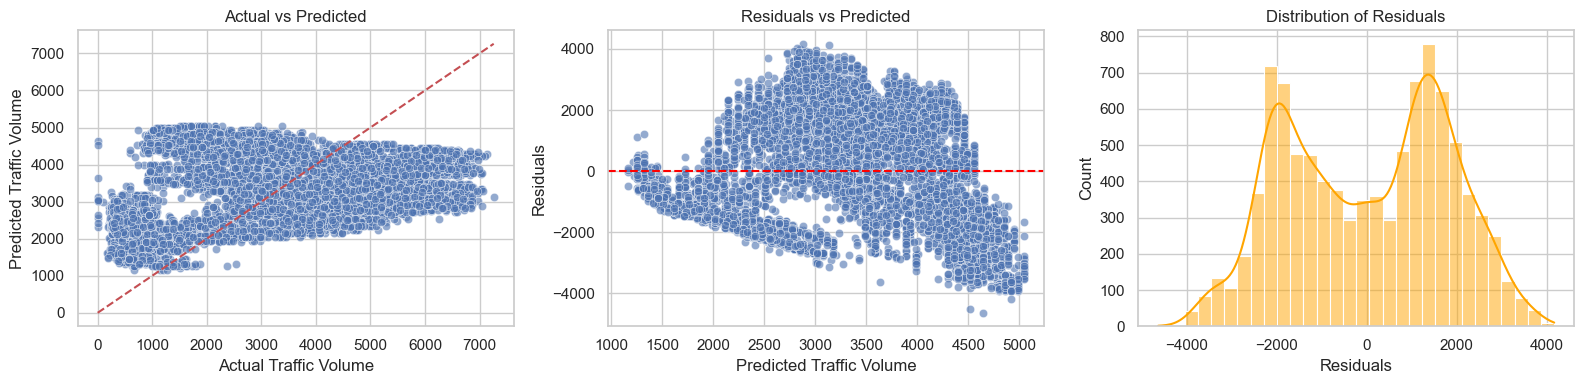

In [788]:
residuals = y_test - y_pred

plt.figure(figsize=(16, 4))

# 1. Actual vs Predicted
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.grid(True)

# 2. Residual Plot
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', ls='--')
plt.xlabel('Predicted Traffic Volume')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.grid(True)

# 3. Histogram of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

## Feature Engineering: Cyclical Encoding of Hour and Weekday

### Overview
Many time-based features such as `hour` of the day and `weekday` are **cyclical** in nature:  
- After hour 23 comes hour 0 (midnight resets the cycle)
- After Sunday (weekday=6) comes Monday (weekday=0)

Directly using integer values for these features in a linear model assumes a straight-line relationship, which creates artificial discontinuities (e.g., difference between hour 23 and 0 is interpreted as "23" instead of a small circular gap).

**To overcome this** and preserve the cyclical relationships

<class 'pandas.core.frame.DataFrame'>
Index: 48075 entries, 0 to 48203
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   is_rain                            48075 non-null  int32  
 1   is_snow                            48075 non-null  int32  
 2   is_weekend                         48075 non-null  bool   
 3   is_holiday                         48075 non-null  bool   
 4   weather_main_cleaned_other         48075 non-null  bool   
 5   weather_main_cleaned_clear         48075 non-null  bool   
 6   weather_main_cleaned_clouds        48075 non-null  bool   
 7   weather_main_cleaned_drizzle       48075 non-null  bool   
 8   weather_main_cleaned_fog           48075 non-null  bool   
 9   weather_main_cleaned_haze          48075 non-null  bool   
 10  weather_main_cleaned_mist          48075 non-null  bool   
 11  weather_main_cleaned_rain          48075 non-null  bool   


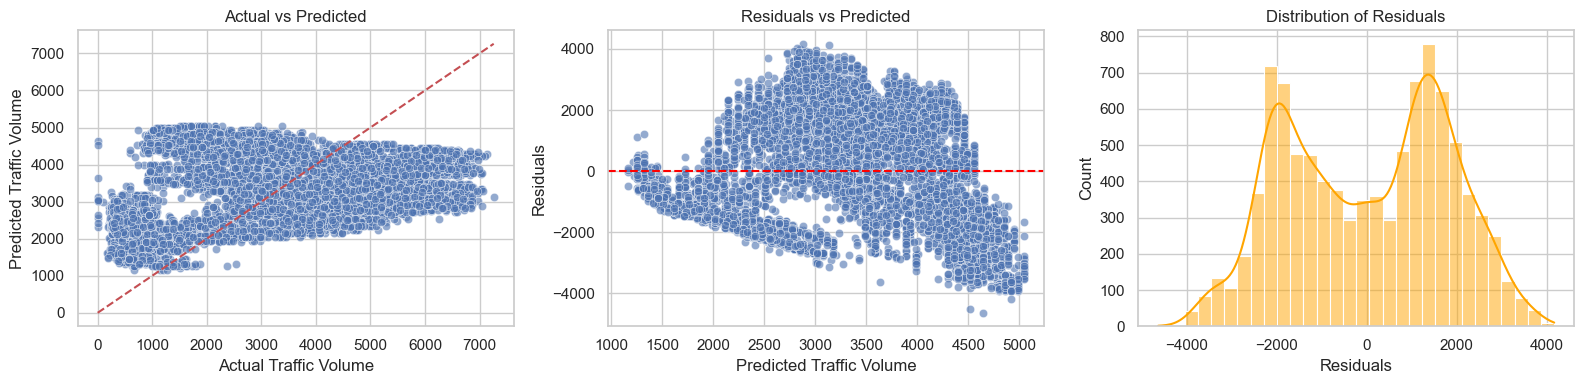

In [789]:
new_dataframe['hour_sin'] = np.sin(2 * np.pi * new_dataframe['hour']/24)
new_dataframe['hour_cos'] = np.cos(2 * np.pi * new_dataframe['hour']/24)
new_dataframe['weekday_sin'] = np.sin(2 * np.pi * new_dataframe['weekday']/7)
new_dataframe['weekday_cos'] = np.cos(2 * np.pi * new_dataframe['weekday']/7)
new_dataframe.drop(['weekday', 'hour'], axis=1, inplace=True)

new_dataframe.info()

X = new_dataframe.drop('traffic_volume', axis=1) 
y = new_dataframe['traffic_volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = LinearRegression()
baseline_model.fit(X_train_scaled, y_train)
y_pred = baseline_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")

residuals = y_test - y_pred

plt.figure(figsize=(16, 4))

# 1. Actual vs Predicted
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.grid(True)

# 2. Residual Plot
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', ls='--')
plt.xlabel('Predicted Traffic Volume')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.grid(True)

# 3. Histogram of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

#### Effect of Sine/Cosine Encoding for Cyclical Time Features

- **Observation:** Adding cyclical features (hour/weekday with sine/cosine encoding) did not meaningfully improve linear model fit.
- **Interpretation:** While sin/cos encoding allows the model to "see" the periodicity of time, a linear regression still cannot represent sharp peaks, plateaus, or step changes in traffic that arise in urban data (i.e., transitions at rush hour, weekends, holidays).
- **Residual Patterns:** The clear bifurcation and strong non-random structure in the residuals demonstrate the presence of distinct sub-populations (e.g., rush hour vs. off-peak), which linear models cannot capture without explicit interaction features or nonlinearity.
- **Takeaway:** Sine/cosine encoding is necessary for cyclical variables, but **not sufficient** for representing truly complex, non-linear relationships—especially when the true relationship with the target is not a simple sine wave!
- **Recommendation:** For further improvement, use tree-based or ensemble models (RandomForest, XGBoost) or explicitly add interaction features.


### Observations from Linear Regression

Despite careful feature engineering—including cyclical encoding of `hour` and `weekday` using sin/cos—the linear regression model still struggles with the complexity of urban traffic volume prediction:

- There is significant **underfitting**, as demonstrated by:
    - Actual vs. Predicted plots with points clustering off the diagonal line or within tight bands.
    - Residual analysis showing structured errors (branches or multi-modal distributions).
- The error distribution (residuals) is often multi-peaked or wide, indicating the presence of **hidden sub-patterns** or seasonal effects that linear models cannot represent.
- Even proper encoding of cyclical features is **necessary but not sufficient**—relationships between variables and the target (traffic volume) are highly non-linear and involve complex interactions.

### Why Move to Non-linear Models?

Tree-based ensemble models such as **RandomForest** can:

- Capture complex, non-linear interactions between features.
- Automatically handle feature splits, interactions, and variable importance.
- Produce significantly better performance and residual behavior in real-world, multi-modal data scenarios (such as traffic flow).

---

### Next Step

> **In the following step, we will train and evaluate a RandomForestRegressor on the same set of features. We expect the model to better capture the non-linear and multi-patterned nature of traffic volume, resulting in improved prediction metrics and more random (less structured) residuals.**

---

RandomForest MAE: 296.8
RandomForest RMSE: 499.4
RandomForest R²: 0.936


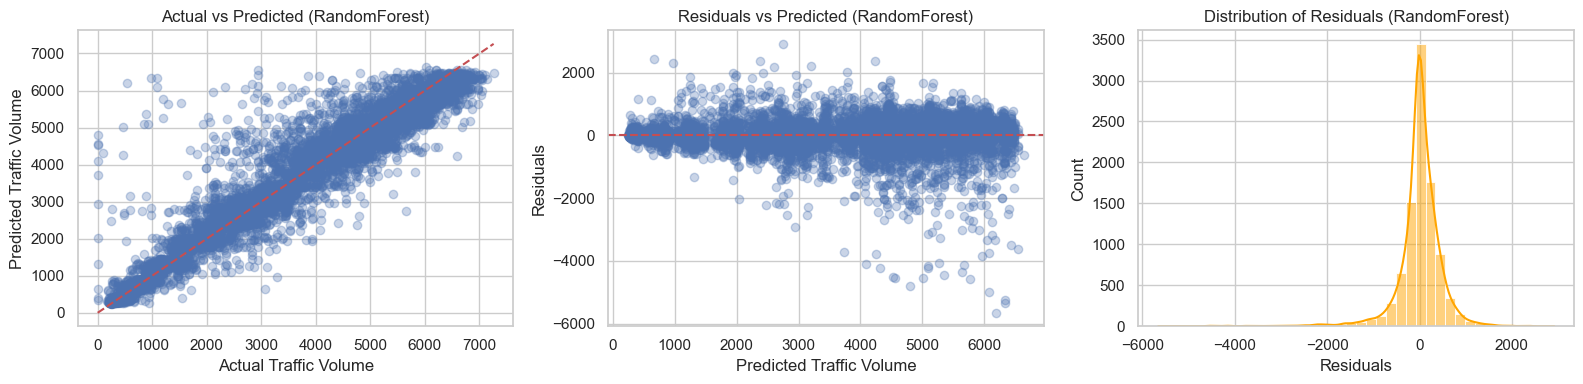

In [790]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f'RandomForest MAE: {mae_rf:.1f}')
print(f'RandomForest RMSE: {rmse_rf:.1f}')
print(f'RandomForest R²: {r2_rf:.3f}')

fig, axs = plt.subplots(1, 3, figsize=(16, 4))


axs[0].scatter(y_test, y_pred_rf, alpha=0.3)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', ls='--')
axs[0].set_xlabel('Actual Traffic Volume')
axs[0].set_ylabel('Predicted Traffic Volume')
axs[0].set_title('Actual vs Predicted (RandomForest)')

residuals_rf = y_test - y_pred_rf
axs[1].scatter(y_pred_rf, residuals_rf, alpha=0.3)
axs[1].axhline(0, color='r', ls='--')
axs[1].set_xlabel('Predicted Traffic Volume')
axs[1].set_ylabel('Residuals')
axs[1].set_title('Residuals vs Predicted (RandomForest)')

sns.histplot(residuals_rf, bins=40, kde=True, ax=axs[2], color='orange')
axs[2].set_xlabel('Residuals')
axs[2].set_title('Distribution of Residuals (RandomForest)')
plt.tight_layout()
plt.show()

### RandomForest Model Evaluation – Diagnostic Plots

**1. Actual vs Predicted:**  
- The predictions are tightly clustered around the diagonal, indicating highly accurate predictions across the range of traffic volumes.
- No evidence of the “band”/funnel pattern seen in the linear model — sub-populations, rush-hours, and off-peak periods are well captured.

**2. Residuals vs Predicted:**  
- Residuals are randomly scattered around zero, with no visible structure or bifurcation.
- The absence of systematic errors and reduction of outlier bias confirm the ability of RandomForest to model the complex non-linear patterns in urban traffic.

**3. Distribution of Residuals:**  
- The residual distribution is sharply peaked around zero, close to normal. 
- The tails are considerably shorter and more symmetric compared to the linear model.
- No more pronounced bimodality.

> **Takeaway:**  
> The RandomForestRegressor has dramatically improved both prediction quality and the statistical behavior of errors, demonstrating the critical value of non-linear models with time-varying, multi-modal real-world data.
